# **Task - Develop A Neural Network That Can Read Handwriting**
**Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN.**

# **LetsGrowMore Data Science Intern January 2022**

# **Author - Archana Rathore**

# **Dataset - MNIST DATASET**

In [1]:
import os
ROOT = "/content/drive/MyDrive/colab notebooks"

In [2]:
os.chdir(ROOT)

In [3]:
os.getcwd()

'/content/drive/MyDrive/colab notebooks'

In [4]:
import tensorflow as tf

In [5]:
checklist = ['GPU','CPU']
for device in checklist:
  out_ = tf.config.list_physical_devices(device)
  if len(out_) > 0:
    print(f"{device} is available")
    print("details",out_)
  else:
    print(f"{device} is not available")  

GPU is available
details [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


**Import required libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [7]:
# Download and read Dataset
# Keras already contain mnist dataset 
# Loading mnist data using Keras
mnist = tf.keras.datasets.mnist
(X_train_full,Y_train_full),(X_test,Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
# Shape of the mnist dataset

In [9]:
print(f"Data type of X train full:{X_train_full.dtype},\nShape of X train full:{X_train_full.shape}")

Data type of X train full:uint8,
Shape of X train full:(60000, 28, 28)


In [10]:
print(f"Data type of Y train full:{Y_train_full.dtype},\nShape of Y train full:{Y_train_full.shape}")

Data type of Y train full:uint8,
Shape of Y train full:(60000,)


In [11]:
print(f"Data type of X test full:{X_test.dtype},\nShape of X test full:{X_test.shape}")

Data type of X test full:uint8,
Shape of X test full:(10000, 28, 28)


In [12]:
print(f"Data type of Y test full:{Y_test.dtype},\nShape of Y test full:{Y_test.shape}")


Data type of Y test full:uint8,
Shape of Y test full:(10000,)


In [13]:
#create a validation data set from the training data.
#Scale the data between 0 and 1 by dividing it by 255 as it is an unsigned integer(0-255).
X_valid , X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
Y_valid , Y_train = Y_train_full[:5000] , Y_train_full[5000:]

#scale the test data as well
X_test = X_test/255.

In [14]:
print(X_valid.shape)
print(X_train.shape)

(5000, 28, 28)
(55000, 28, 28)


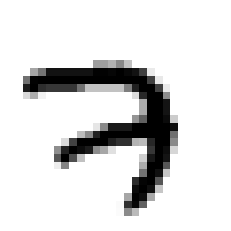

In [15]:
#lets view the first data point of X_train
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

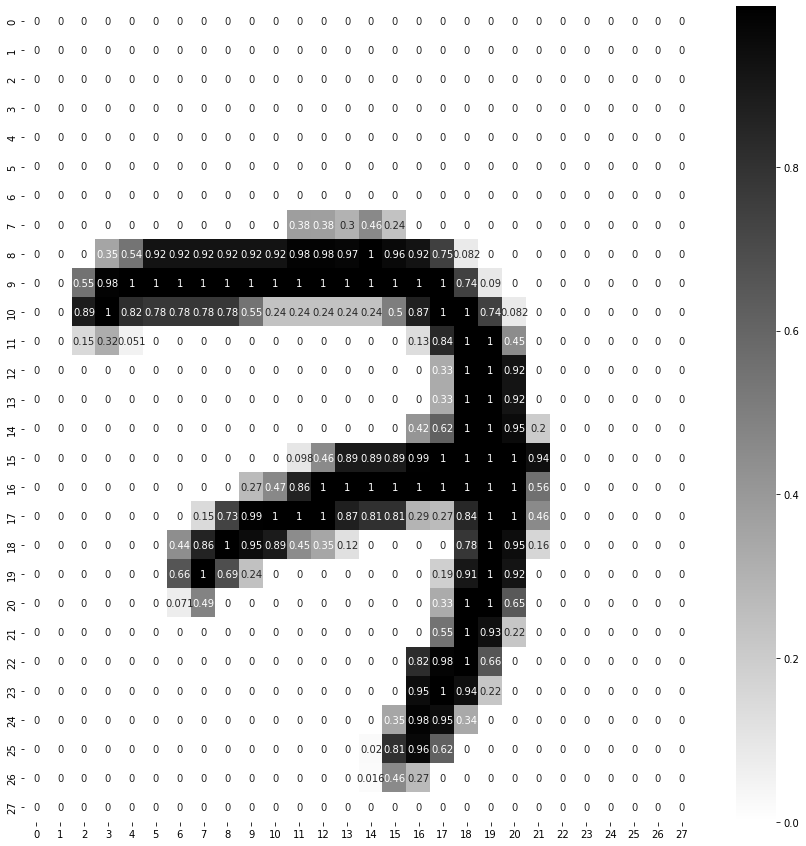

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True , cmap="binary")

In [17]:
#actual value of y_train
Y_train[0]

7

**Model Building**

In [18]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation ="relu",name="hiddenlayer1"),
          tf.keras.layers.Dense(100,activation = "relu",name = "hiddenlayer2"),
          tf.keras.layers.Dense(10,activation = "softmax",name="outputlayer")]

model_clf = tf.keras.models.Sequential(LAYERS)        

In [19]:
model_clf.layers

In [20]:
#Model summary
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
# firsLayer * secondLayer + bias
784*300 + 300

235500

In [22]:
# total parameter
sum((235300,30100,1010))

266410

In [23]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [24]:
# 1st hidden layer weights
hidden1.get_weights()

[array([[ 0.00433455, -0.05845001, -0.01446368, ...,  0.03816214,
         -0.02227759, -0.06784631],
        [ 0.05625753, -0.01500474, -0.01818006, ..., -0.05601545,
         -0.07427771,  0.05736205],
        [ 0.01752097,  0.03077961, -0.02690545, ...,  0.07335643,
          0.04206917,  0.00061859],
        ...,
        [-0.04825067, -0.0690119 ,  0.06795129, ...,  0.02569775,
         -0.07204674,  0.06994559],
        [-0.01622251,  0.02790209, -0.03685612, ...,  0.07088512,
         -0.00959832, -0.00135583],
        [ 0.04124881,  0.00842092, -0.03588073, ...,  0.03872182,
         -0.00624232,  0.000779  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
weights , biases = hidden1.get_weights()

In [26]:
print(f"weights: {weights.shape}")

weights: (784, 300)


In [27]:
print(f"biases :{biases.shape}")

biases :(300,)


**Fit the Model with Training and Validation Data**

In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD" # to mininmize the loss , we are using sgd to minimizeloss function
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,optimizer = OPTIMIZER , metrics = METRICS)

**EARLY STOPPING CALLBACKS**

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


**MODEL CHECKPOINTING CALLBACK**

In [30]:
CKPT_PATH = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_PATH,save_best_only = True)

In [31]:
EPOCHS = 20
VALIDATION_SET = (X_valid, Y_valid)

history = model_clf.fit(X_train, Y_train, epochs=EPOCHS,validation_data=VALIDATION_SET, callbacks=[early_stopping,checkpointing_cb])

Epoch 1/20
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6211 - accuracy: 0.8391 - val_loss: 0.3058 - val_accuracy: 0.9144
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2878 - accuracy: 0.9177 - val_loss: 0.2399 - val_accuracy: 0.9334
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2342 - accuracy: 0.9325 - val_loss: 0.2008 - val_accuracy: 0.9462
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1979 - accuracy: 0.9439 - val_loss: 0.1737 - val_accuracy: 0.9530
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1723 - accuracy: 0.9509 - val_loss: 0.1531 - val_accuracy: 0.9582
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1521 - accuracy: 0.9564 - val_loss: 0.1419 - val_accuracy: 0.9618
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1363 - accuracy: 0.9616 - val_loss: 0.1280 - val_accuracy:

In [32]:
df = pd.DataFrame(history.history)

In [33]:
df ## for every epoch 

,loss,accuracy,val_loss,val_accuracy
0,0.621078,0.839055,0.305764,0.9144
1,0.287768,0.917745,0.239871,0.9334
2,0.234160,0.932509,0.200819,0.9462
3,0.197910,0.943855,0.173710,0.9530
4,0.172258,0.950873,0.153098,0.9582
5,0.152081,0.956436,0.141879,0.9618
6,0.136298,0.961564,0.127953,0.9662
7,0.123694,0.965073,0.121672,0.9660
8,0.112792,0.967873,0.113857,0.9678
9,0.103069,0.970782,0.106124,0.9700


**Plotting Accuracy & Loss**

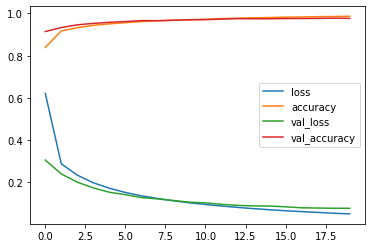

In [34]:
df.plot()

In [35]:
model_clf.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9751


[0.0799289271235466, 0.9750999808311462]

In [36]:
10000/32 # evaluate function is taking random 313 data points and predicting the value

312.5

In [37]:
x_new = X_test[:3]
y_prob = model_clf.predict(x_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [38]:
y_pred = np.argmax(y_prob , axis=-1) # returns the index of maximum value
y_pred

array([7, 2, 1])

If we dont use axis parameter argmax will return the maximum of all the array elements.
  

In [39]:
Y_test[:3]

array([7, 2, 1], dtype=uint8)

**Plot graph between predicted and actual value**

In [40]:
# Lets plot a graph between predicted and actual value :
# x_new -- data
# y_pred -- predicted value
# Y_test -- actual value

In [41]:
y_test_new = Y_test[:3]

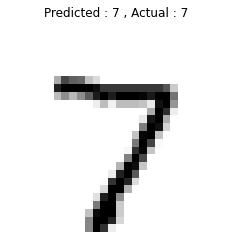

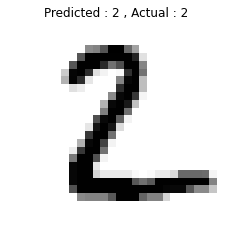

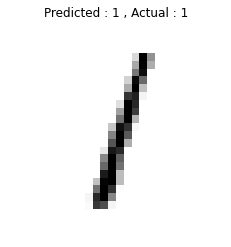

In [42]:
for data, predicted , actual in zip(x_new , y_pred , y_test_new):
  plt.imshow(data , cmap = "binary")
  plt.title(f"Predicted : {predicted} , Actual : {actual}")
  plt.axis("off")
  plt.show()
  print("=================================")